In [1]:
import sys
sys.path.append('E:/zlab/')

from plotnet import draw_feed_forward, DynamicShow

TensorFlow 的计算模型是有向图,采用**数据流图** (Data Flow Graphs)，其中每个**节点**代表一些函数或计算，而**边**代表了数值、矩阵或张量。

## 数据流图

数据流图是用于定义计算结构的。在 TensorFlow 中，数据流图本质上是一组链接在一起的函数，每个函数都会将其输出传递给 $0$ 个、$1% 个或多个位于这个级联链上的其他函数。

Press `c` to save figure to "计算图.png", `Ctrl+d` to break >>
> c:\programdata\anaconda3\lib\site-packages\viznet\context.py(45)__exit__()
-> plt.savefig(self.filename, dpi=300)
(Pdb) c


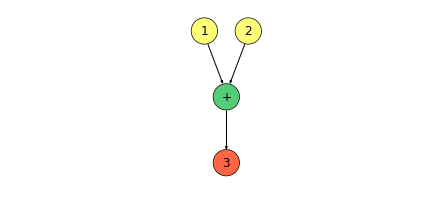

In [2]:
with DynamicShow((6, 3), '计算图.png') as d:  # 隐藏坐标轴
    seq_list = draw_feed_forward(d.ax, num_node_list=[2, 1, 1])
    seq_list[0][0].text('$1$') 
    seq_list[0][1].text('$2$')
    seq_list[1][0].text('$+$')  
    seq_list[2][0].text('$3$')

如上图，我们使用数据流图表示了 $1 + 2 = 3$ 这一个运算。

![IMG20180922175053](https://i.loli.net/2018/09/22/5ba611772dace.jpg)

我们也可以将其抽象化:

Press `c` to save figure to "计算图1.png", `Ctrl+d` to break >>
> c:\programdata\anaconda3\lib\site-packages\viznet\context.py(45)__exit__()
-> plt.savefig(self.filename, dpi=300)
(Pdb) c


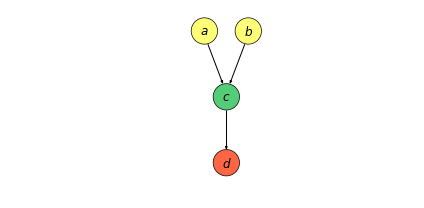

In [3]:
with DynamicShow((6, 3), '计算图1.png') as d:  # 隐藏坐标轴
    seq_list = draw_feed_forward(d.ax, num_node_list=[2, 1, 1])
    seq_list[0][0].text('$a$') 
    seq_list[0][1].text('$b$')
    seq_list[1][0].text('$c$')  
    seq_list[2][0].text('$d$')

我们也可以将上述过程简化为:

Press `c` to save figure to "计算图1.png", `Ctrl+d` to break >>
> c:\programdata\anaconda3\lib\site-packages\viznet\context.py(45)__exit__()
-> plt.savefig(self.filename, dpi=300)
(Pdb) c


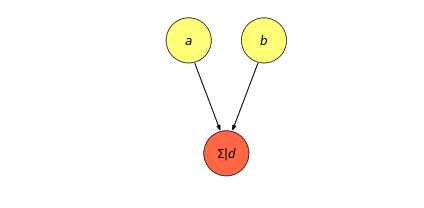

In [5]:
with DynamicShow((6, 3), '计算图1.png') as d:  # 隐藏坐标轴
    seq_list = draw_feed_forward(d.ax, num_node_list=[2, 1])
    seq_list[0][0].text('$a$') 
    seq_list[0][1].text('$b$')
    seq_list[1][0].text('$\Sigma|d$')  

将节点 $c$ 与 $d$ 合并，若 $c$ 表示求和运算，$d$ 表示非线性变换，则上图可以看作是一个**神经元**。

除了节点和边的概念，数据流图还有一个十分关键的概念：**依赖关系**。

Press `c` to save figure to "计算图1.png", `Ctrl+d` to break >>
> c:\programdata\anaconda3\lib\site-packages\viznet\context.py(45)__exit__()
-> plt.savefig(self.filename, dpi=300)
(Pdb) c


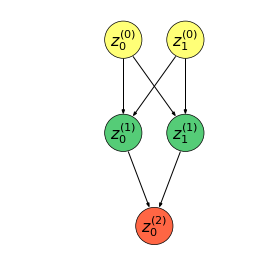

In [11]:
with DynamicShow((4, 4), '计算图1.png') as d:  # 隐藏坐标轴
    seq_list = draw_feed_forward(d.ax, num_node_list=[2, 2, 1])
    for i, layer_nodes in enumerate(seq_list):
        [node.text('$z_%i^{(%i)}$'%(j, i), 'center', fontsize=16) for j, node in enumerate(layer_nodes)]

我们一般地，像 $z_0^{(0)}$ 与 $z_0^{(1)}$ 直接连接，称为**直接依赖**，而像 $z_0^{(0)}$ 与 $z_0^{(2)}$，称为**间接依赖**。即 $z_0^{(1)}$ 直接依赖于 $z_0^{(0)}$ 和 $z_1^{(0)}$，而 $z_0^{(2)}$ 间接依赖依赖于 $z_0^{(0)}$ 和 $z_1^{(0)}$。

In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a = tf.constant(2 ,name='a')
b = tf.constant(3, name='b')
c = a + b
d = c * a + b

In [3]:
with tf.Session() as sess:
    print(sess.run(d))
    writer = tf.summary.FileWriter('D:/Graph/', sess.graph)

13


In [15]:
g1 = tf.Graph()
g2 = tf.Graph()

with g1.as_default():
    a = tf.constant(5)
    b = tf.constant([1, 2, 3])
    c = a + b
    
with g2.as_default():
    d = tf.constant(1)

In [17]:
with tf.Session(graph=g2) as sess:
    print(sess.run(d))

1


In [1]:
from IPython.display import Image